<a href="https://colab.research.google.com/github/felmateos/predict-academic-success/blob/main/AcademicSuccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações do projeto

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

sns.set_theme(style="darkgrid")

# Importando  base de dados

### Base armazenada no mesmo repositório do GitHub que esse notebook


In [40]:
dataset_url = 'https://raw.githubusercontent.com/felmateos/predict-academic-success/main/dataset.csv'
df = pd.read_csv(dataset_url, sep=',', on_bad_lines='skip')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Analise preliminar

In [41]:
df.shape

(4424, 35)

In [42]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# Pré-processamento

In [44]:
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

não temos valores nulos. :)

In [45]:
print(df.duplicated().sum())

0


Nem valores duplicados. :D

# Pré-processamento

## renomear as classes do rótulo para valores em {-1, 0, 1}

In [46]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [47]:
df['Target'] = df['Target'].map({
    'Dropout':-1,
    'Enrolled':0,
    'Graduate':1
})

In [48]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [49]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.178119
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,-1.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,-1.000000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,0.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


In [50]:
corr = df.corr()['Target'].sort_values(ascending=False)

high_corr = []

for i,v in corr.items():
    if v > 0.05 and i != 'Target':
        high_corr.append(i)

print(high_corr)
k_features = len(high_corr)
print(k_features)

['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Scholarship holder', 'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (enrolled)', 'Displaced', 'Curricular units 2nd sem (evaluations)', 'Application order', 'Daytime/evening attendance', 'Curricular units 2nd sem (credited)', "Father's occupation"]
14


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# Plotando

## vendo se há uma correlação entre as unidades curriculares do 1º e 2º semestre

In [52]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

In [53]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (grade)',
             y = 'Curricular units 2nd sem (grade)',
             color = 'Target')
fig.show()

In [54]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

aparenta existir uma correlação linear

In [55]:
fig = px.box(df, y='Age at enrollment')
fig.show()

existe uma grande concentração de pessoas mais jovens (prox. aos 20 anos)

<Axes: xlabel='Age at enrollment', ylabel='Count'>

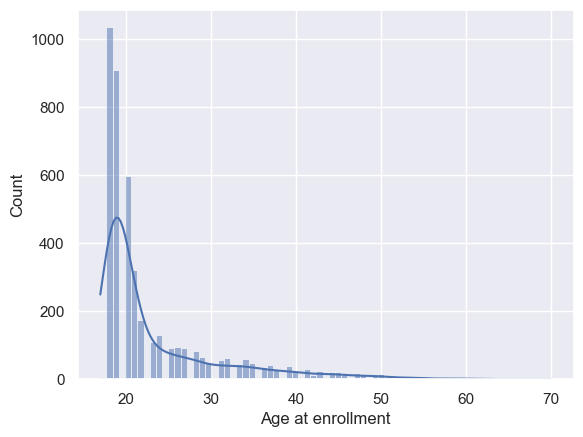

In [56]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=df['Age at enrollment'], kde=True)

o histograma possibilita uma visão mais clara deste fenomeno. Havendo um pico de observações na casa dos 20 anos

## proporção de observações de cada classe do rótulo (target)

In [57]:
target_proportion = df['Target'].value_counts()

x = target_proportion.index
y = target_proportion.values

target_proportion = pd.DataFrame({
    'Target':x,
    'Count':y
})

fig = px.pie(target_proportion,
            names='Target', 
            values='Count',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])

fig.show()

c:\Users\felma\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\numeric.py:2463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



# Predição de sucesso acadêmico

## Seleção de atributos

In [58]:
X = df.iloc[:,0:34]
y = df.iloc[:,-1]

X.shape

(4424, 34)

In [59]:
from sklearn.feature_selection import SelectKBest

features = k_features

print(X.shape)
print(y.shape)

X = SelectKBest(k=features).fit_transform(X, y)

X = pd.DataFrame(X)
X.sample(10)



(4424, 34)
(4424,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
116,8.0,0.0,1.0,0.0,1.0,20.0,6.0,13.0,2.0,10.000000,6.0,12.0,4.0,10.750000
2402,1.0,0.0,0.0,1.0,0.0,20.0,5.0,9.0,3.0,12.000000,5.0,7.0,3.0,11.000000
4012,12.0,0.0,1.0,0.0,0.0,30.0,6.0,0.0,0.0,0.000000,6.0,0.0,0.0,0.000000
3146,1.0,0.0,1.0,0.0,1.0,18.0,6.0,6.0,6.0,11.333333,6.0,8.0,6.0,11.333333
3454,8.0,0.0,0.0,0.0,0.0,22.0,5.0,9.0,2.0,10.000000,5.0,11.0,1.0,10.000000
1806,1.0,0.0,1.0,1.0,1.0,19.0,5.0,10.0,5.0,11.800000,5.0,12.0,3.0,11.500000
2446,4.0,0.0,1.0,1.0,0.0,44.0,7.0,9.0,7.0,13.500000,5.0,6.0,5.0,16.200000
2344,8.0,0.0,1.0,1.0,0.0,19.0,7.0,8.0,7.0,12.121429,9.0,12.0,8.0,11.506250
2505,1.0,0.0,1.0,0.0,1.0,18.0,8.0,8.0,7.0,13.585714,8.0,8.0,7.0,13.585714
1467,8.0,0.0,1.0,1.0,0.0,21.0,5.0,10.0,4.0,13.200000,5.0,7.0,4.0,14.250000


In [60]:
work_df = X.assign(Target = y)

work_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Target
2349,12.0,0.0,1.0,1.0,0.0,44.0,6.0,6.0,6.0,12.666667,6.0,6.0,6.0,11.500000,1
2300,15.0,0.0,1.0,1.0,0.0,23.0,7.0,12.0,3.0,14.000000,6.0,12.0,1.0,14.000000,0
637,12.0,0.0,1.0,0.0,0.0,27.0,5.0,9.0,3.0,10.666667,5.0,7.0,4.0,11.400000,0
3765,1.0,0.0,1.0,0.0,1.0,22.0,7.0,9.0,6.0,13.081667,8.0,12.0,6.0,13.150000,1
2998,1.0,0.0,1.0,0.0,0.0,19.0,6.0,6.0,6.0,14.666667,6.0,8.0,6.0,13.666667,1
1585,1.0,0.0,1.0,1.0,0.0,20.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1
2070,1.0,0.0,1.0,0.0,0.0,19.0,6.0,7.0,6.0,12.833333,6.0,10.0,6.0,11.777778,1
1113,12.0,0.0,1.0,0.0,0.0,25.0,5.0,11.0,3.0,10.666667,5.0,11.0,3.0,11.333333,0
1233,8.0,0.0,1.0,0.0,0.0,19.0,6.0,6.0,6.0,12.833333,6.0,6.0,6.0,12.666667,1
2512,8.0,0.0,1.0,0.0,0.0,19.0,7.0,8.0,7.0,13.198571,8.0,8.0,8.0,13.062500,1


In [61]:
work_df.corr()['Target']

0        -0.212025
1        -0.240999
2         0.409827
3        -0.229270
4         0.297595
5        -0.243438
6         0.155974
7         0.044362
8         0.529123
9         0.485207
10        0.175847
11        0.092721
12        0.624157
13        0.566827
Target    1.000000
Name: Target, dtype: float64

In [62]:
X = work_df.iloc[:,0:features]
y = work_df.iloc[:,-1]
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,8.0,0.0,1.0,1.0,0.0,20.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,6.0,0.0,0.0,1.0,0.0,19.0,6.0,6.0,6.0,14.000000,6.0,6.0,6.0,13.666667
2,1.0,0.0,0.0,1.0,0.0,19.0,6.0,0.0,0.0,0.000000,6.0,0.0,0.0,0.000000
3,8.0,0.0,1.0,0.0,0.0,20.0,6.0,8.0,6.0,13.428571,6.0,10.0,5.0,12.400000
4,12.0,0.0,1.0,0.0,0.0,45.0,6.0,9.0,5.0,12.333333,6.0,6.0,6.0,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,0.0,1.0,1.0,0.0,19.0,6.0,7.0,5.0,13.600000,6.0,8.0,5.0,12.666667
4420,1.0,1.0,0.0,0.0,0.0,18.0,6.0,6.0,6.0,12.000000,6.0,6.0,2.0,11.000000
4421,1.0,0.0,1.0,0.0,1.0,30.0,7.0,8.0,7.0,14.912500,8.0,9.0,1.0,13.500000
4422,1.0,0.0,1.0,0.0,1.0,20.0,5.0,5.0,5.0,13.800000,5.0,6.0,5.0,12.000000


## Divisão de treino e teste
### Contém Target = {-1:"Dropout", 0: "Enrolled", 1:"Graduate"}

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 14)
(885, 14)
(3539,)
(885,)


## Usando Regressão Logistica

In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=800)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Without scaling:", accuracy_score(y_pred, y_test))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("With scaling: ", scores.mean())

Without scaling: 0.7581920903954802
With scaling:  0.7615106992525729


## Usando KNN

In [66]:
X_train.columns.size

14

In [67]:
from sklearn.neighbors import KNeighborsClassifier

scores = []

for k in range(X_train.columns.size-1):

    clf = KNeighborsClassifier(n_neighbors=k+1)

    clf.fit(X_train, y_train)

    scores.append(clf.score(X_test, y_test))


<Axes: >

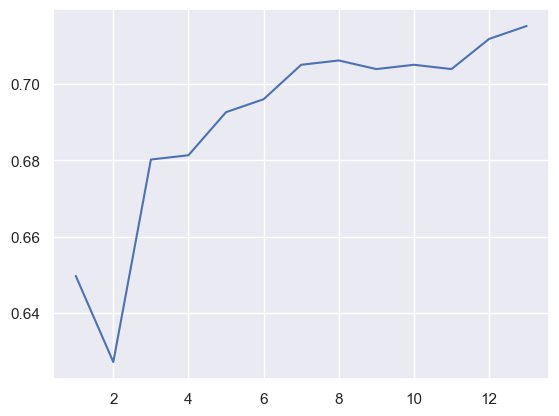

In [68]:
x = pd.Series(range(1, features))
sns.lineplot(x=x, y=scores)

In [69]:
clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.7050847457627119


### Usando Matriz de confusão para avaliar o modelo treinado usando KNN

[[0.64539007 0.12765957 0.22695035]
 [0.27272727 0.26666667 0.46060606]
 [0.02968037 0.06164384 0.9086758 ]]


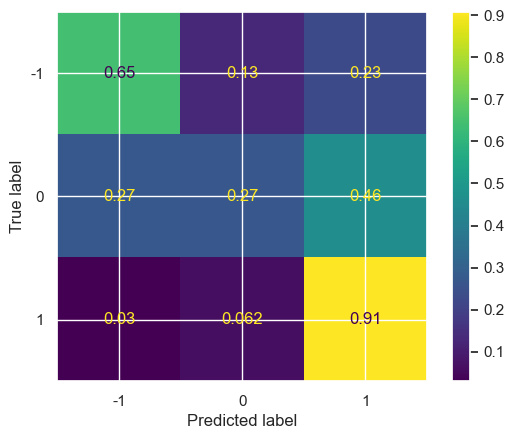

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, normalize='true')

print(disp.confusion_matrix)

plt.show()

## Removendo Target = 0 (Enrolled), porque não tem movitvo para manter se vamos prever se a pessoa vai se graduar ou não

In [71]:
work_df = work_df[work_df['Target'] != 0]

### Separando o dataset restante em treino e teste

In [72]:
X = work_df.iloc[:,0:features]
y = work_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2904, 14)
(726, 14)
(2904,)
(726,)


### Retreinando o modelo usando o novo dataset

In [73]:
scores = []

for k in range(X_train.columns.size-1):

    clf = KNeighborsClassifier(n_neighbors=k+1)

    clf.fit(X_train, y_train)

    scores.append(clf.score(X_test, y_test))

<Axes: >

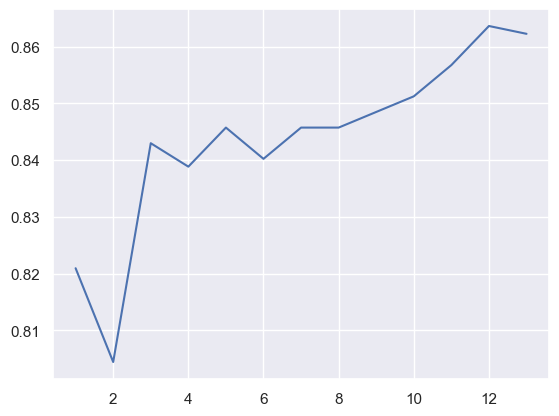

In [74]:
x = pd.Series(range(1, features))
sns.lineplot(x=x, y=scores)

In [75]:
clf = KNeighborsClassifier(n_neighbors=12)

clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.8636363636363636


### Avaliando novo modelo usando matriz de confusão

[[0.71777003 0.28222997]
 [0.04100228 0.95899772]]


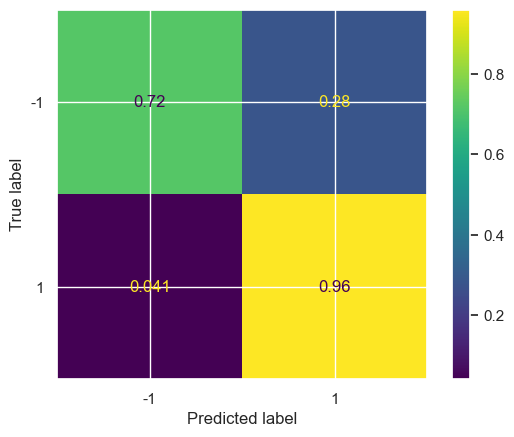

In [76]:
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, normalize='true')

print(disp.confusion_matrix)

plt.show()

# Conclusão

Tendo em vista que pretendi prever o sucesso acadêmico, treinei um modelo a fim de que ele fosse capaz de obter maior acurácia em sua classe principal (Approved: 1). Desse modo, o objetivo foi cumprido ao se obter uma acurácia de 96% com as classificações positivas (approved: 1).